In [30]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model

In [31]:
#resize all images to this size
image_size = [224,224]

train_path = 'C:/Users/santy/Face Recg/Train'
test_path = 'C:/Users/santy/Face Recg/Test'

In [32]:
#add preprocessing layer in front of VGG
vgg = VGG16(input_shape = image_size + [3], weights='imagenet', include_top=False)
#existing weights need not be trained
for layer in vgg.layers:
    layer.trainable = False
    

In [33]:
#getting number of classes
folders = glob('C:/Users/santy/Face Recg/Train/*')

In [34]:
#our layer
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [35]:
#create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [36]:
#model structure
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [37]:
#specifying cost and activation function to be used by the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [38]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
)

In [39]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [43]:
training_set = train_datagen.flow_from_directory('C:/Users/santy/Face Recg/Train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('C:/Users/santy/Face Recg/Test',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 399 images belonging to 4 classes.
Found 399 images belonging to 4 classes.


In [44]:
#fit the model
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

C:\Users\santy\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
13/13 [==============================] - 128s 10s/step - loss: 0.5634 - accuracy: 0.8697 - val_loss: 0.0283 - val_accuracy: 0.9975
Epoch 2/5
13/13 [==============================] - 138s 11s/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 3.1222e-05 - val_accuracy: 1.0000
Epoch 3/5
13/13 [==============================] - 136s 11s/step - loss: 1.5693e-04 - accuracy: 1.0000 - val_loss: 1.7257e-05 - val_accuracy: 1.0000
Epoch 4/5
13/13 [==============================] - 136s 11s/step - loss: 1.5714e-04 - accuracy: 1.0000 - val_loss: 1.0408e-05 - val_accuracy: 1.0000
Epoch 5/5
13/13 [==============================] - 135s 11s/step - loss: 7.9700e-05 - accuracy: 1.0000 - val_loss: 6.9445e-06 - val_accuracy: 1.0000


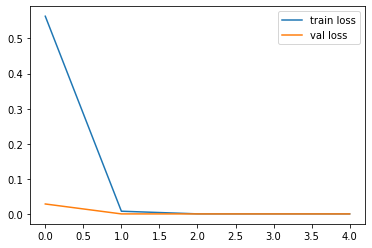

<Figure size 432x288 with 0 Axes>

In [46]:
#loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LOssVal_loss')

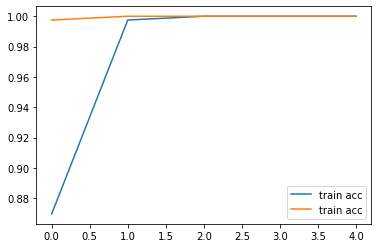

<Figure size 432x288 with 0 Axes>

In [54]:
#accuracy
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='train acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [55]:
model.save('facefeatures_new_model')

INFO:tensorflow:Assets written to: facefeatures_new_model\assets
